## 1. Introduction

In [1]:
class ListNode:

    def __init__(self, data):
        
        self.data = data
        self.next = None

In [2]:
a = ListNode(11)
b = ListNode(52)
c = ListNode(18)

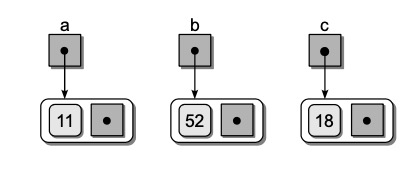

In [3]:
a.next = b
b.next = c

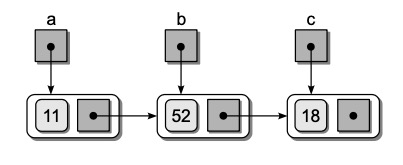

In [4]:
b = None
c = None

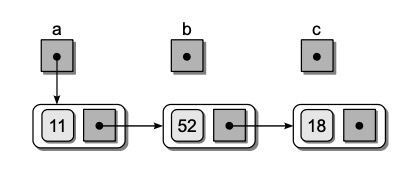

In [6]:
print(a.data)
print(a.next.data) 
print(a.next.next.data)

11
52
18


## 2. The Singly Linked List

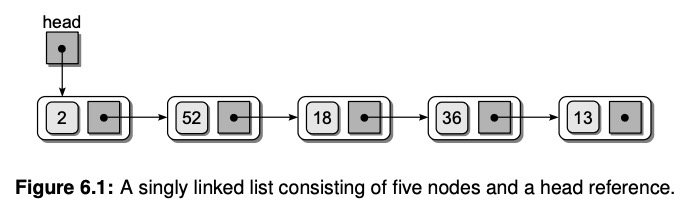

In [18]:
head = ListNode(2)
head.next = ListNode(52)
head.next.next = ListNode(18)
head.next.next.next = ListNode(36)
head.next.next.next.next = ListNode(13)

### 2.1 Traversing the Nodes

In [14]:
def traversal(head):
    curNode = head

    while curNode is not None:
        print(curNode.data)
        curNode = curNode.next

In [19]:
traversal(head)

2
52
18
36
13


### 2.2 Searching for a Node

In [15]:
def unorderedSearch(head, target):
    curNode = head

    while curNode is not None and curNode.data != target:
        curNode = curNode.next

    return curNode is not None

In [20]:
unorderedSearch(head, 52)

True

### 2.3 Prepending Nodes

When modifying or changing links in a linked list, we **must consider the case when the list is empty**.

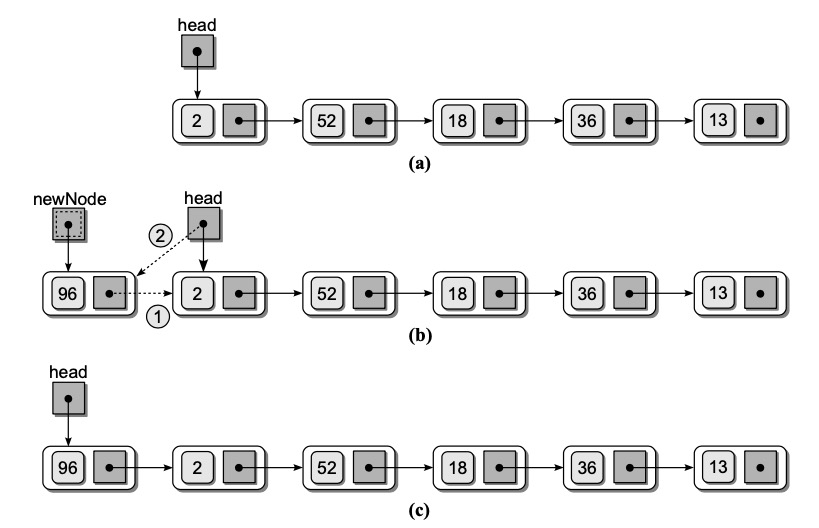

In [22]:
newNode = ListNode(96)
newNode.next = head
head = newNode

In [23]:
traversal(head)

96
2
52
18
36
13


### 2.4 Removing Nodes
Given the head reference, remove a target from a linked list.

general case:

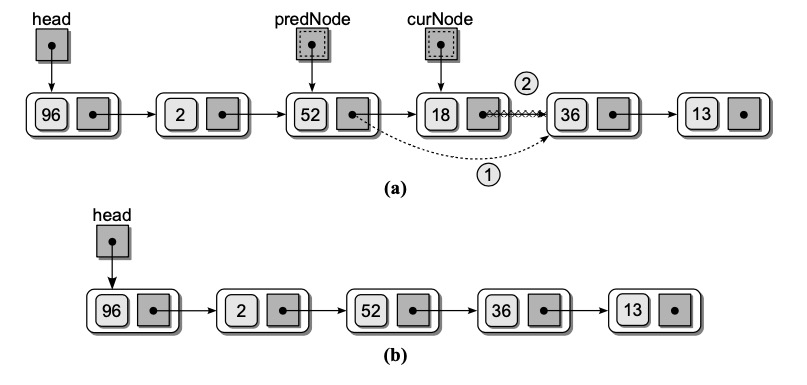

special case: the target node is the head

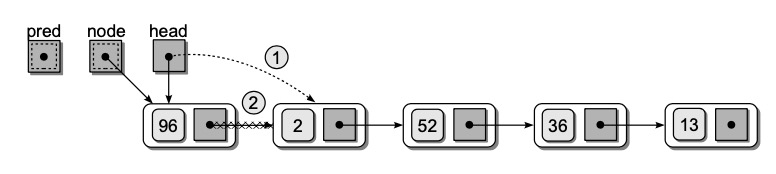

In [30]:
#Given the head reference, remove a target from a linked list.
def remove(head, target):
    
    curNode = head
    preNode = None

    while curNode is not None and curNode.data != target:
        preNode = curNode
        curNode = curNode.next

    if curNode is not None:
        if curNode is head:   # special case
            head = curNode.next
            curNode.next = None
        else:                 # general case
            preNode.next = curNode.next
            curNode.next = None
    return head

In [31]:
traversal(head)

96
2
52
18
36
13


In [32]:
head = remove(head, 2)
traversal(head)

96
52
18
36
13


In [33]:
head = remove(head, 96)
traversal(head)

52
18
36
13


## 3. The Bag ADT Revisited

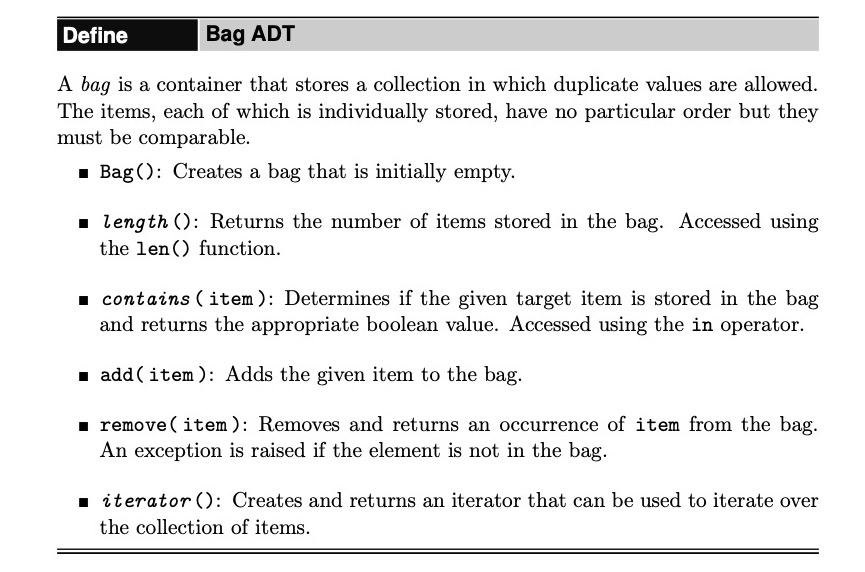

### 3.1 List-Based Implementation Review

In [ ]:
class Bag:

    def __init__(self):
        self._items = list()

    def __len__(self):
        return len(self._items)

    def __contains__(self, item):  #O(n)
        return item in self._items

    def add(self, item):   #O(1)
        self._items.append(item)

    def remove(self, item):  #O(n)
        assert item in self, "the item must be in the bag"
        idx = self._items.index(item)
        return self._items.pop(idx)  # return the item

    def __iter__(self):
        return _BagIterator(self._items)


class _BagIterator:

    def __init__(self, theList):
        self._bagItems = theList
        self._curIdx = 0

    def __iter__(self):
        return self

    def __next__(self):
        if self._curIdx < len(self._bagItems):
            item = self._bagItems[self._curIdx]
            self._curIdx += 1
            return item
        else:
            raise StopIteration

### 3.2 A Linked List Implementation

In [1]:
class LinkedBag:

    def __init__(self):
        
        self._head = None
        self._size = 0

    
    def __len__(self):
        
        return self._size

    
    def __contains__(self, item):  #O(n)
        
        curNode = self._head

        while curNode is not None and curNode._data != item:
            curNode = curNode.next

        return curNode is not None


    def add(self, item):  #O(1)

        newNode = BagListNode(item)
        newNode.next = self._head
        self._head = newNode
        self._size += 1


    def remove(self, item):  #O(n)

        curNode = self._head
        preNode = None

        while curNode is not None and curNode.data != item:
            preNode = curNode
            curNode = curNode.next

        assert curNode is not None, "the item must be in the bag"

        self_size -= 1
        if curNode is self._head:
            self._head = curNode.next
            curNode.next = None
        else:
            preNode.next = curNode.next
            curNode.next = None

        return curNode.data


    def __iter__(self):

        return _LinkedBagIterator(self._head)


class _LinkedBagIterator:

    def __init__(self, theHead):
        self._curNode = theHead

    def __iter__(self):
        return self

    def __next__(self):
        if self._curNode is not None:
            item = self._curNode.data
            self._curNode = self._curNode.next
            return item
        else:
            raise StopIteration
    


class BagListNode:

    def __init__(self, data):
        self.data = data
        self.next = None

### 3.3 Comparing Implementations

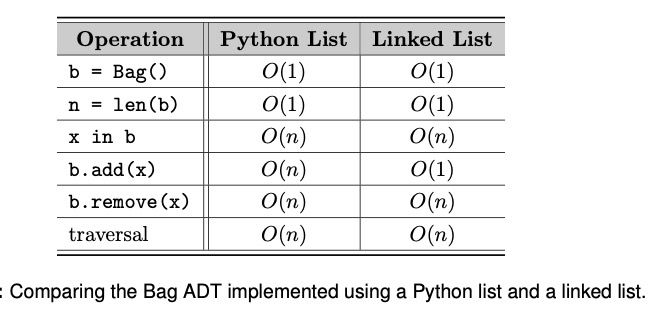

## 4. More Ways to Build a Linked List

### 4.1 Using a Tail Reference

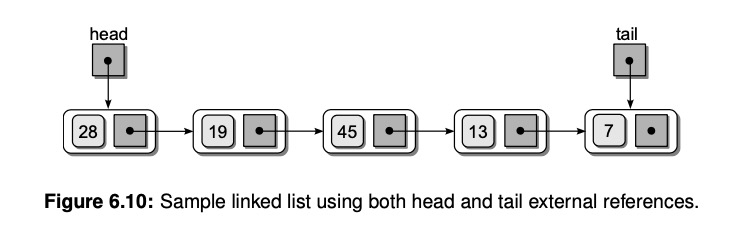

#### 4.1.1 Appending Nodes: Given the head and tail pointers, adds an item to a linked list.

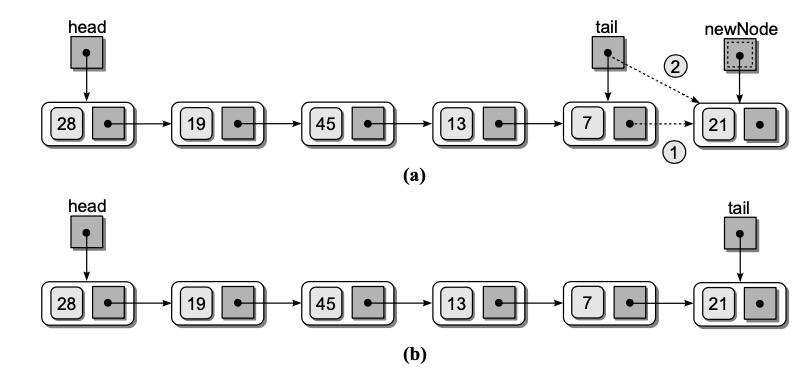

In [ ]:
# Given the head and tail pointers, adds an item to a linked list.
newNode = ListNode(21)
if head is None:
    head = newNode
else:
    tail.next = newNode
tail = newNode

#### 4.1.2 Removing Nodes: Given the head and tail references, removes a target from a linked list.

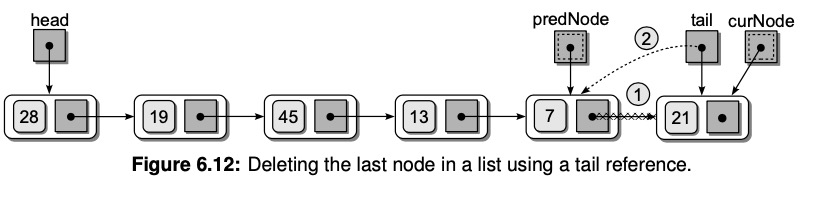

**Special Case:** If the list contains a single node, the **head** reference will be assigned **`None`** when it is assigned the contents of the node’s **next** field. The **tail** reference will also be set to **`None`** when it is set to **predNode**.

In [ ]:
#Given the head and tail references, removes a target from a linked list.
preNode = None
curNode = head

while curNode is not None and curNode.data != target:
    preNode = curNode
    curNode = curNode.next

if curNode is not None:
    if curNode is head:
        head = curNode.next
    else:
        preNode.next = curNode.next
    if curNode is tail:
        tail = preNode
    curNode.next = None